# Data exploration about the recent history of the Olympic Games

Hey, thanks for viewing my Kernel!

If you like my work, please, leave an upvote: it will be really appreciated and it will motivate me in offering more content to the Kaggle community ! :)

Today, we will explore a dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016.

### Index of content

1. Data Cleaning

    1.1 Impute Missing Values
    
    1.2 Drop Constant Columns
    
    1.3 Matching Incorrectly Spelt Words
    
    1.4 Delete Sports With Less Than One Participant
    
2. Data Prepartion
3. Show Best Age, Height and Weight For Each Sport
4. Show Best Country For Each Sport
5. Show The Change of Top Countries by Year

## 1. Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
warnings.simplefilter("ignore")

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 50}
#matplotlib.rc('font', **font)
sns.set(font_scale=2)

/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv
/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv


In [2]:
data = pd.read_csv('../input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')

In [3]:
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [4]:
data.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


#### 1.1 Impute Missing Values

In [6]:
data_clean = data.copy()
data_clean = data_clean.dropna(subset=['Medal'])
data_clean['Age'] = data.groupby(['Sport'])['Age'].transform(lambda x: x.fillna(round(x.mean(), 2)))
data_clean['Height'] = data.groupby(['Sport'])['Height'].transform(lambda x: x.fillna(round(x.mean(), 2)))
data_clean['Weight'] = data.groupby(['Sport'])['Weight'].transform(lambda x: x.fillna(round(x.mean(), 2)))
print(data_clean.isnull().sum())

ID          0
Name        0
Sex         0
Age         0
Height     75
Weight    155
Team        0
NOC         0
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
dtype: int64


#### 1.2 Drop Constant Columns

In [7]:
data_clean.columns[data_clean.nunique() <= 1]

Index([], dtype='object')

#### 1.3 Matching Incorrectly Spelt Words

In [8]:
sport_unique = data_clean['Sport'].unique()
team_unique = data_clean['Team'].unique()

In [9]:
import fuzzywuzzy
from fuzzywuzzy import process

for sport in sport_unique:
    matches = fuzzywuzzy.process.extract(sport, sport_unique, limit=2, 
                                         scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    if matches[1][1] > 90:
        print(sport, matches[1])

for team in team_unique:
    matches = fuzzywuzzy.process.extract(team, team_unique, limit=2, 
                                         scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    if matches[1][1] > 90:
        print(team, matches[1])

Netherlands ('Netherlands-1', 92)
United States ('United States-1', 93)
Soviet Union ('Soviet Union-2', 92)
Unified Team ('Unified Team-2', 92)
Switzerland ('Switzerland-1', 92)
East Germany ('East Germany-1', 92)
Great Britain ('Great Britain-1', 93)
Switzerland-1 ('Switzerland', 92)
Switzerland-2 ('Switzerland', 92)
Czechoslovakia ('Czechoslovakia-1', 93)
United States-1 ('United States', 93)
Great Britain-1 ('Great Britain', 93)
West Germany ('West Germany-1', 92)
Soviet Union-2 ('Soviet Union-1', 93)
East Germany-1 ('East Germany-2', 93)
South Korea ('South Korea-2', 92)
South Korea-2 ('South Korea', 92)
North Korea ('North Korea-1', 92)
Great Britain-2 ('Great Britain', 93)
Elisabeth X ('Elisabeth V', 91)
Ludwigshafener Ruderverein ('Ludwigshafener Ruder Verein-1', 95)
Czech Republic ('Czech Republic-1', 93)
West Germany-1 ('West Germany-2', 93)
United States-2 ('United States', 93)
Leander Club-2 ('Leander Club-1', 93)
Chicago Athletic Association-2 ('Chicago Athletic Association

In [10]:
data_clean["Team"] = data_clean['Team'].str.replace('[^\w\s]','')
data_clean["Team"] = data_clean['Team'].str.replace('\d+', '')
data_clean['Team'] = data_clean['Team'].str.strip()

In [11]:
team_unique = data_clean['Team'].unique()
for team in team_unique:
    matches = fuzzywuzzy.process.extract(team, team_unique, limit=2, 
                                         scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    if matches[1][1] > 90:
        print(team, matches[1])

Elisabeth X ('Elisabeth V', 91)
Ludwigshafener Ruderverein ('Ludwigshafener Ruder Verein', 98)
Sirene ('Irene', 91)
Elisabeth V ('Elisabeth X', 91)
Ludwigshafener Ruder Verein ('Ludwigshafener Ruderverein', 98)
Irene ('Sirene', 91)


In [12]:
for team in team_unique:
    matches = fuzzywuzzy.process.extract(team, team_unique, limit=2, 
                                         scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    if matches[1][1] > 91:
        data_clean[data_clean['Team'] == matches[1][0]] = team

In [13]:
team_unique = data_clean['Team'].unique()
for team in team_unique:
    matches = fuzzywuzzy.process.extract(team, team_unique, limit=2, 
                                         scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    if matches[1][1] > 90:
        print(team, matches[1])

Elisabeth X ('Elisabeth V', 91)
Sirene ('Irene', 91)
Elisabeth V ('Elisabeth X', 91)
Irene ('Sirene', 91)


#### 1.4 Delete Sports With Less Than One Participant

In [14]:
data_groupby = data_clean.groupby(['Sport'])
sport_list = []
for key, item in data_groupby:
    selected_df = data_groupby.get_group(key)
    
    if len(selected_df['Team'].unique()) > 2:
        sport_list.append(key)

In [15]:
data_clean = data_clean[data_clean['Sport'].isin(sport_list)]
data_clean = data_clean.dropna()

## 2. Data Prepartion

In [16]:
data_groupby = data_clean.groupby(['Sport'])
selected_sport_country = {}
for key, item in data_groupby:
    selected_df = data_groupby.get_group(key)
    selected_df = selected_df[selected_df['Medal'] != 'None']
    
    selected_sport_country[key] = selected_df['Team'].value_counts().index[0]

In [17]:
for key in selected_sport_country.keys():
    print(key, '---', selected_sport_country[key])

Alpine Skiing --- Austria
Archery --- South Korea
Art Competitions --- Germany
Athletics --- United States
Badminton --- China
Baseball --- Cuba
Basketball --- United States
Beach Volleyball --- Brazil
Biathlon --- Germany
Bobsleigh --- Switzerland
Boxing --- United States
Canoeing --- Germany
Cross Country Skiing --- Norway
Curling --- Canada
Cycling --- Great Britain
Diving --- United States
Equestrianism --- Germany
Fencing --- Italy
Figure Skating --- United States
Football --- Brazil
Freestyle Skiing --- United States
Golf --- United States Golf Association
Gymnastics --- Soviet Union
Handball --- South Korea
Hockey --- Netherlands
Ice Hockey --- Canada
Judo --- Japan
Lacrosse --- St Louis Amateur Athletic Association
Luge --- Germany
Modern Pentathlon --- Hungary
Nordic Combined --- Norway
Rhythmic Gymnastics --- Russia
Rowing --- United States
Rugby --- United States
Rugby Sevens --- South Africa
Sailing --- United States
Shooting --- United States
Short Track Speed Skating --- 

## 3. Show Best Age, Height and Weight For Each Sport

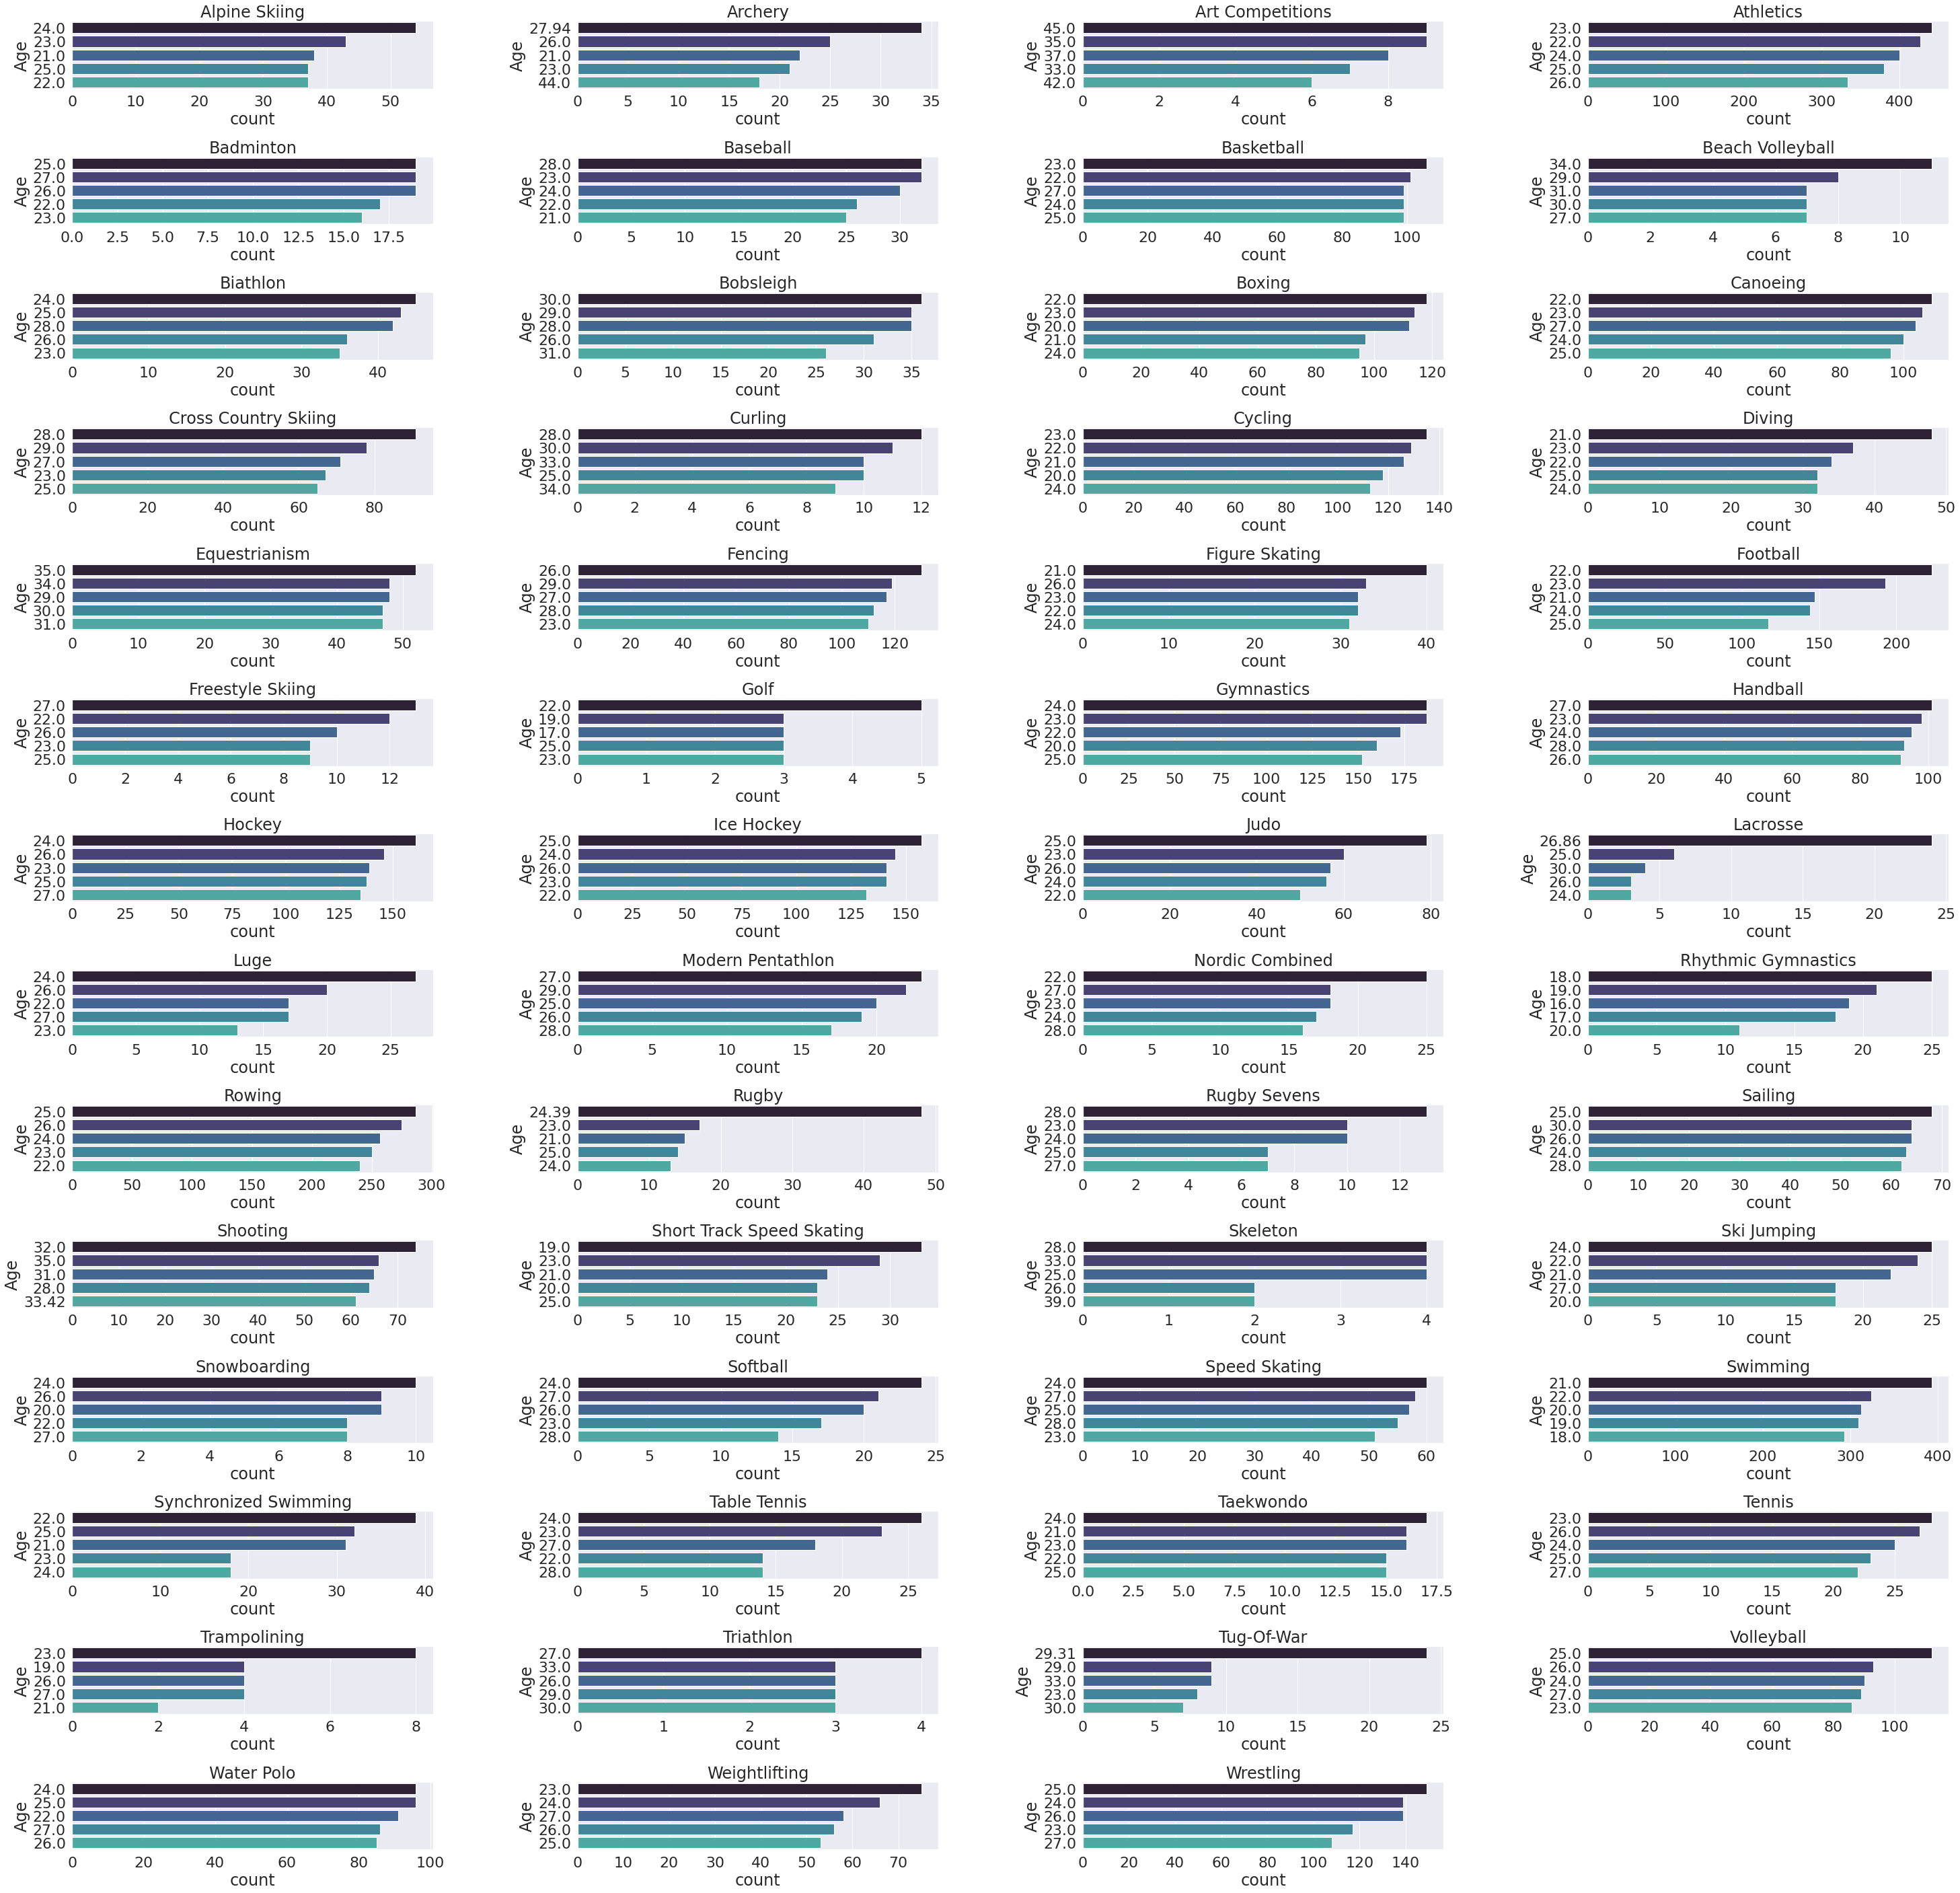

In [18]:
n_cols = 4
nrows = round(len(data_clean['Sport'].unique()) / n_cols)
fig, axes = plt.subplots(nrows, n_cols, figsize=(50,50))
plt.subplots_adjust(wspace=0.4, hspace=1)
index = 0
for row in range(nrows):
    for col in range(n_cols):
        try:
            key = list(selected_sport_country.keys())[index]
        except:
            axes[row][col].set_visible(False)
        
        selected_df = data_clean[data_clean['Sport'] == key]
        selected_country = selected_sport_country[key]
        
        counted_df_index = selected_df['Age'].value_counts().index[0:5]
        
        selected_df = selected_df[selected_df['Age'].isin(counted_df_index)]
        sns.countplot(y="Age", data=selected_df, order=counted_df_index, ax=axes[row][col], palette=sns.color_palette("mako", as_cmap=False)).set_title(key)
        #axes[row][col].set_title(key)
        
        index += 1
plt.show()

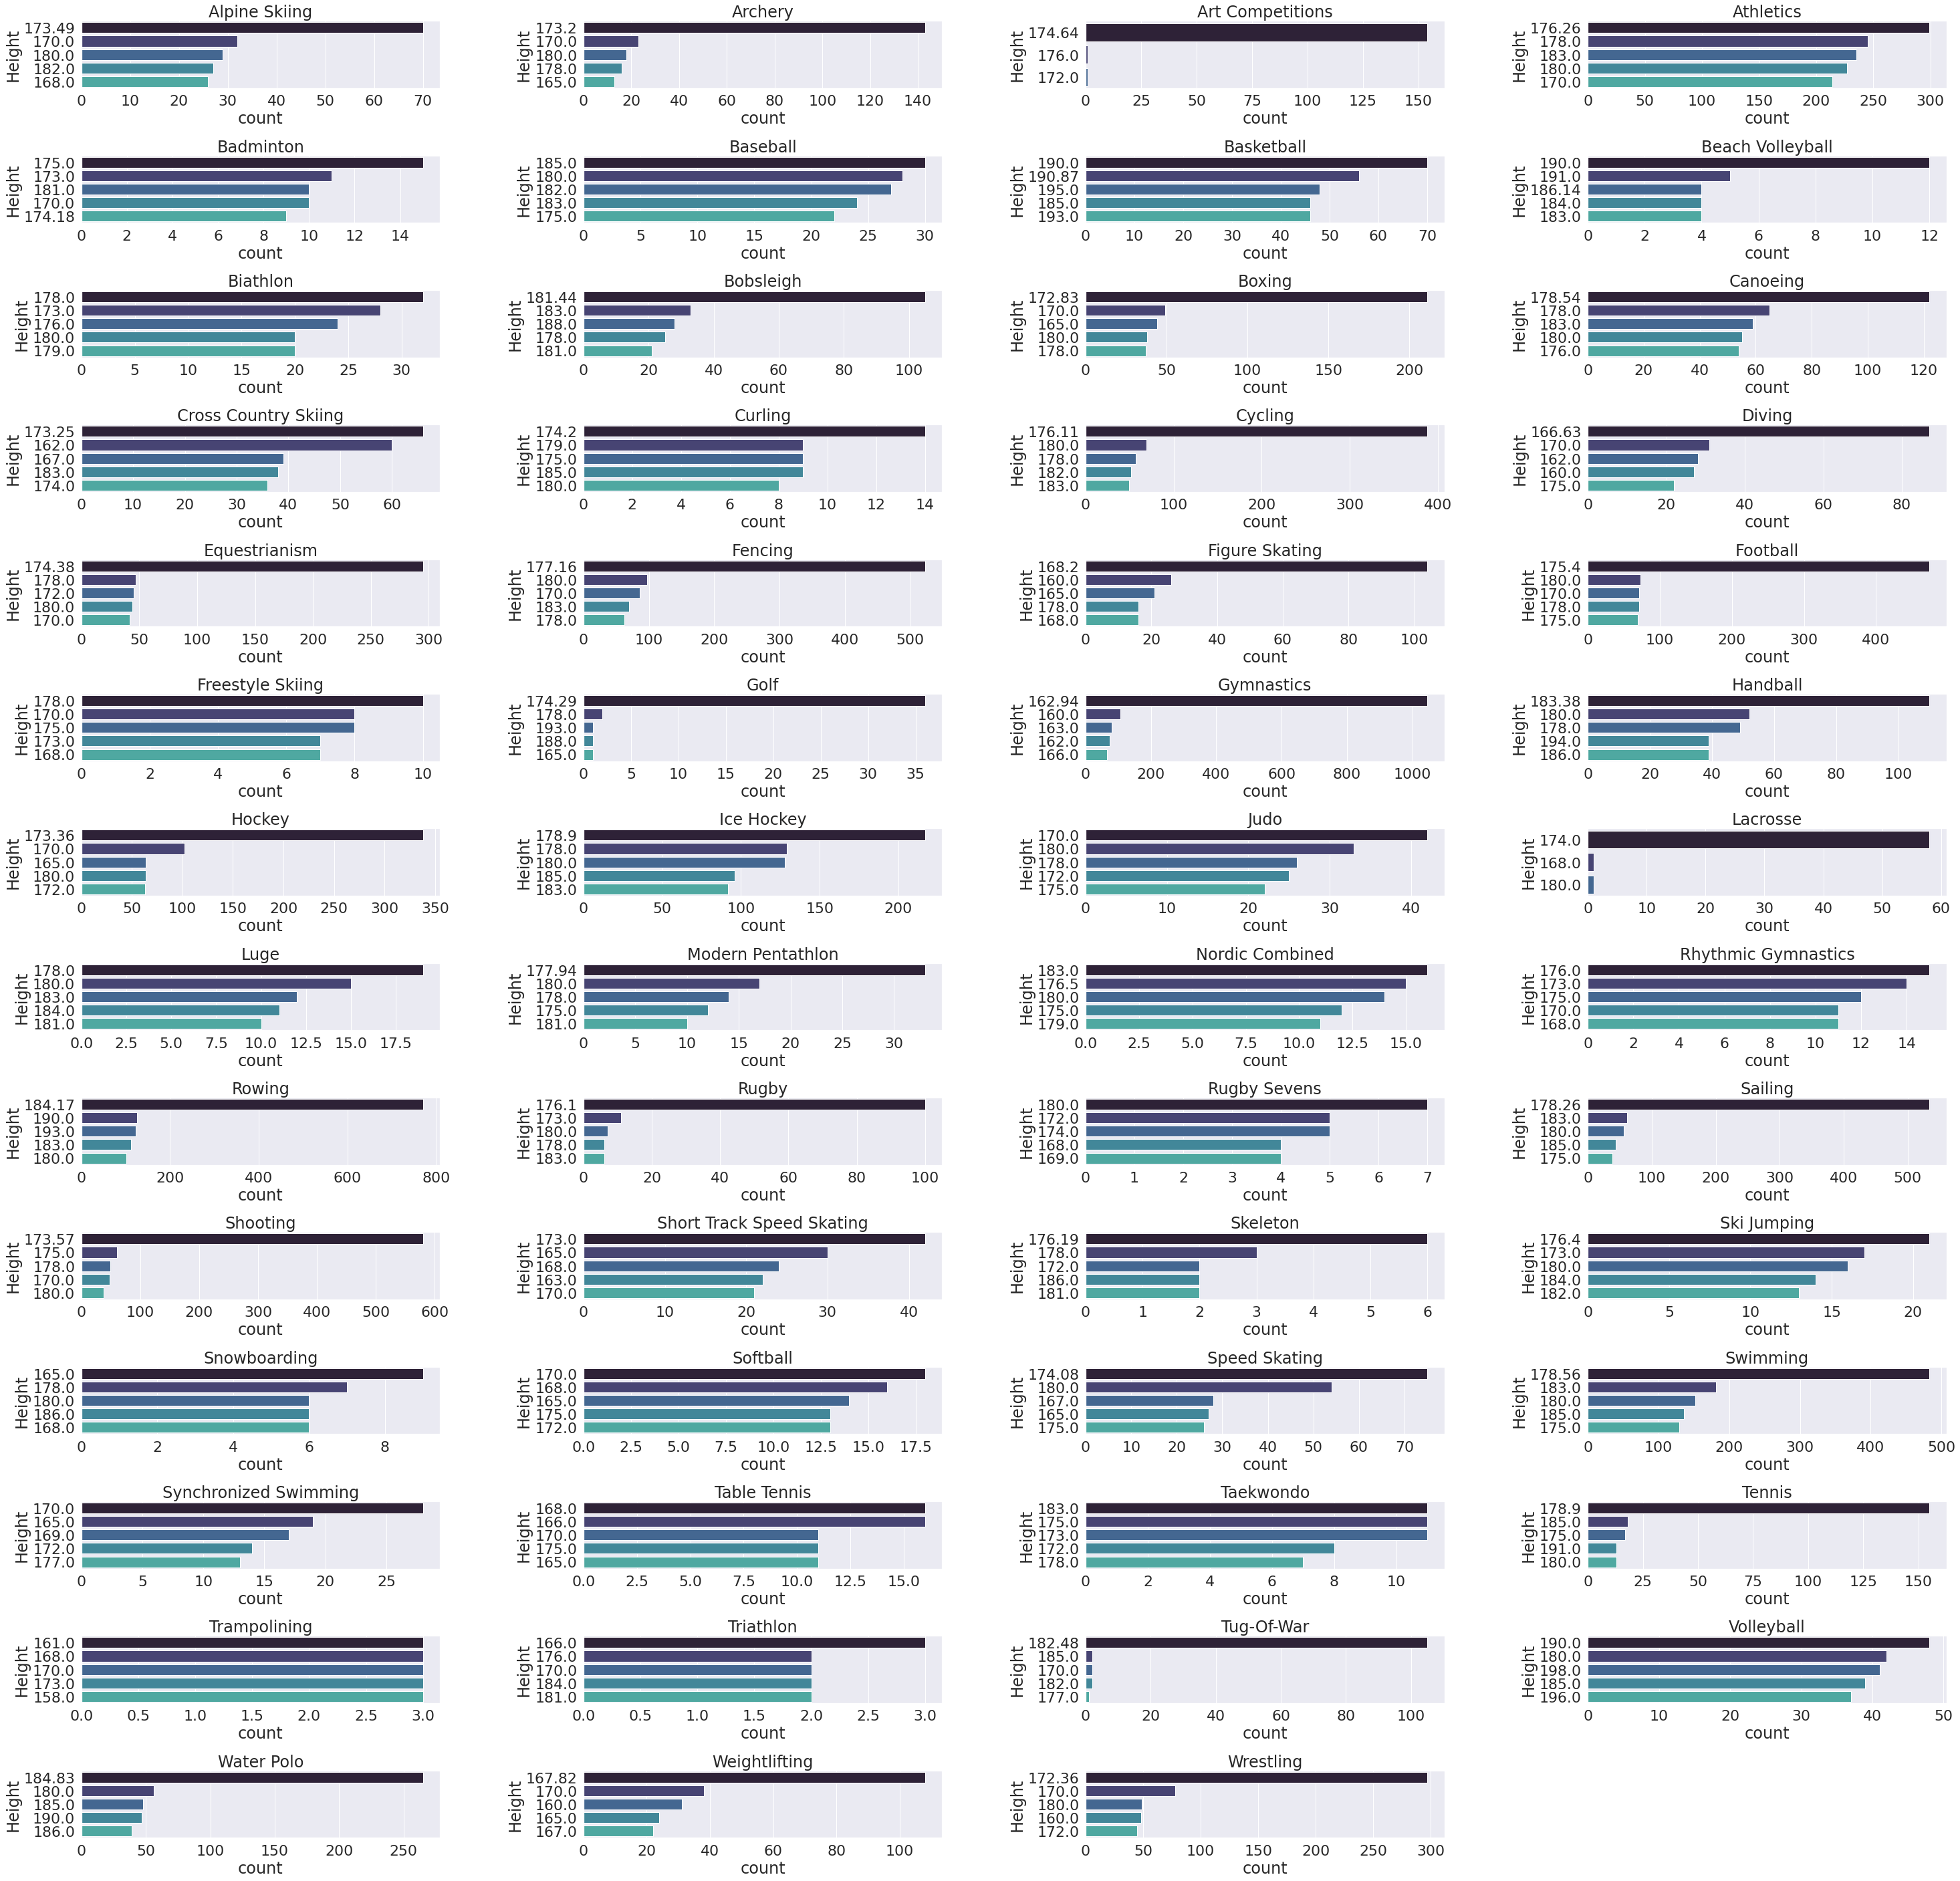

In [19]:
n_cols = 4
nrows = round(len(data_clean['Sport'].unique()) / n_cols)
fig, axes = plt.subplots(nrows, n_cols, figsize=(50,50))
plt.subplots_adjust(wspace=0.4, hspace=1)
index = 0
for row in range(nrows):
    for col in range(n_cols):
        try:
            key = list(selected_sport_country.keys())[index]
        except:
            axes[row][col].set_visible(False)
        
        selected_df = data_clean[data_clean['Sport'] == key]
        selected_country = selected_sport_country[key]
        
        counted_df_index = selected_df['Height'].value_counts().index[0:5]

        selected_df = selected_df[selected_df['Height'].isin(counted_df_index)]
        sns.countplot(y="Height", data=selected_df, order=counted_df_index, ax=axes[row][col], palette=sns.color_palette("mako", as_cmap=False)).set_title(key)
        #axes[row][col].set_title(key)
        
        index += 1
plt.show()

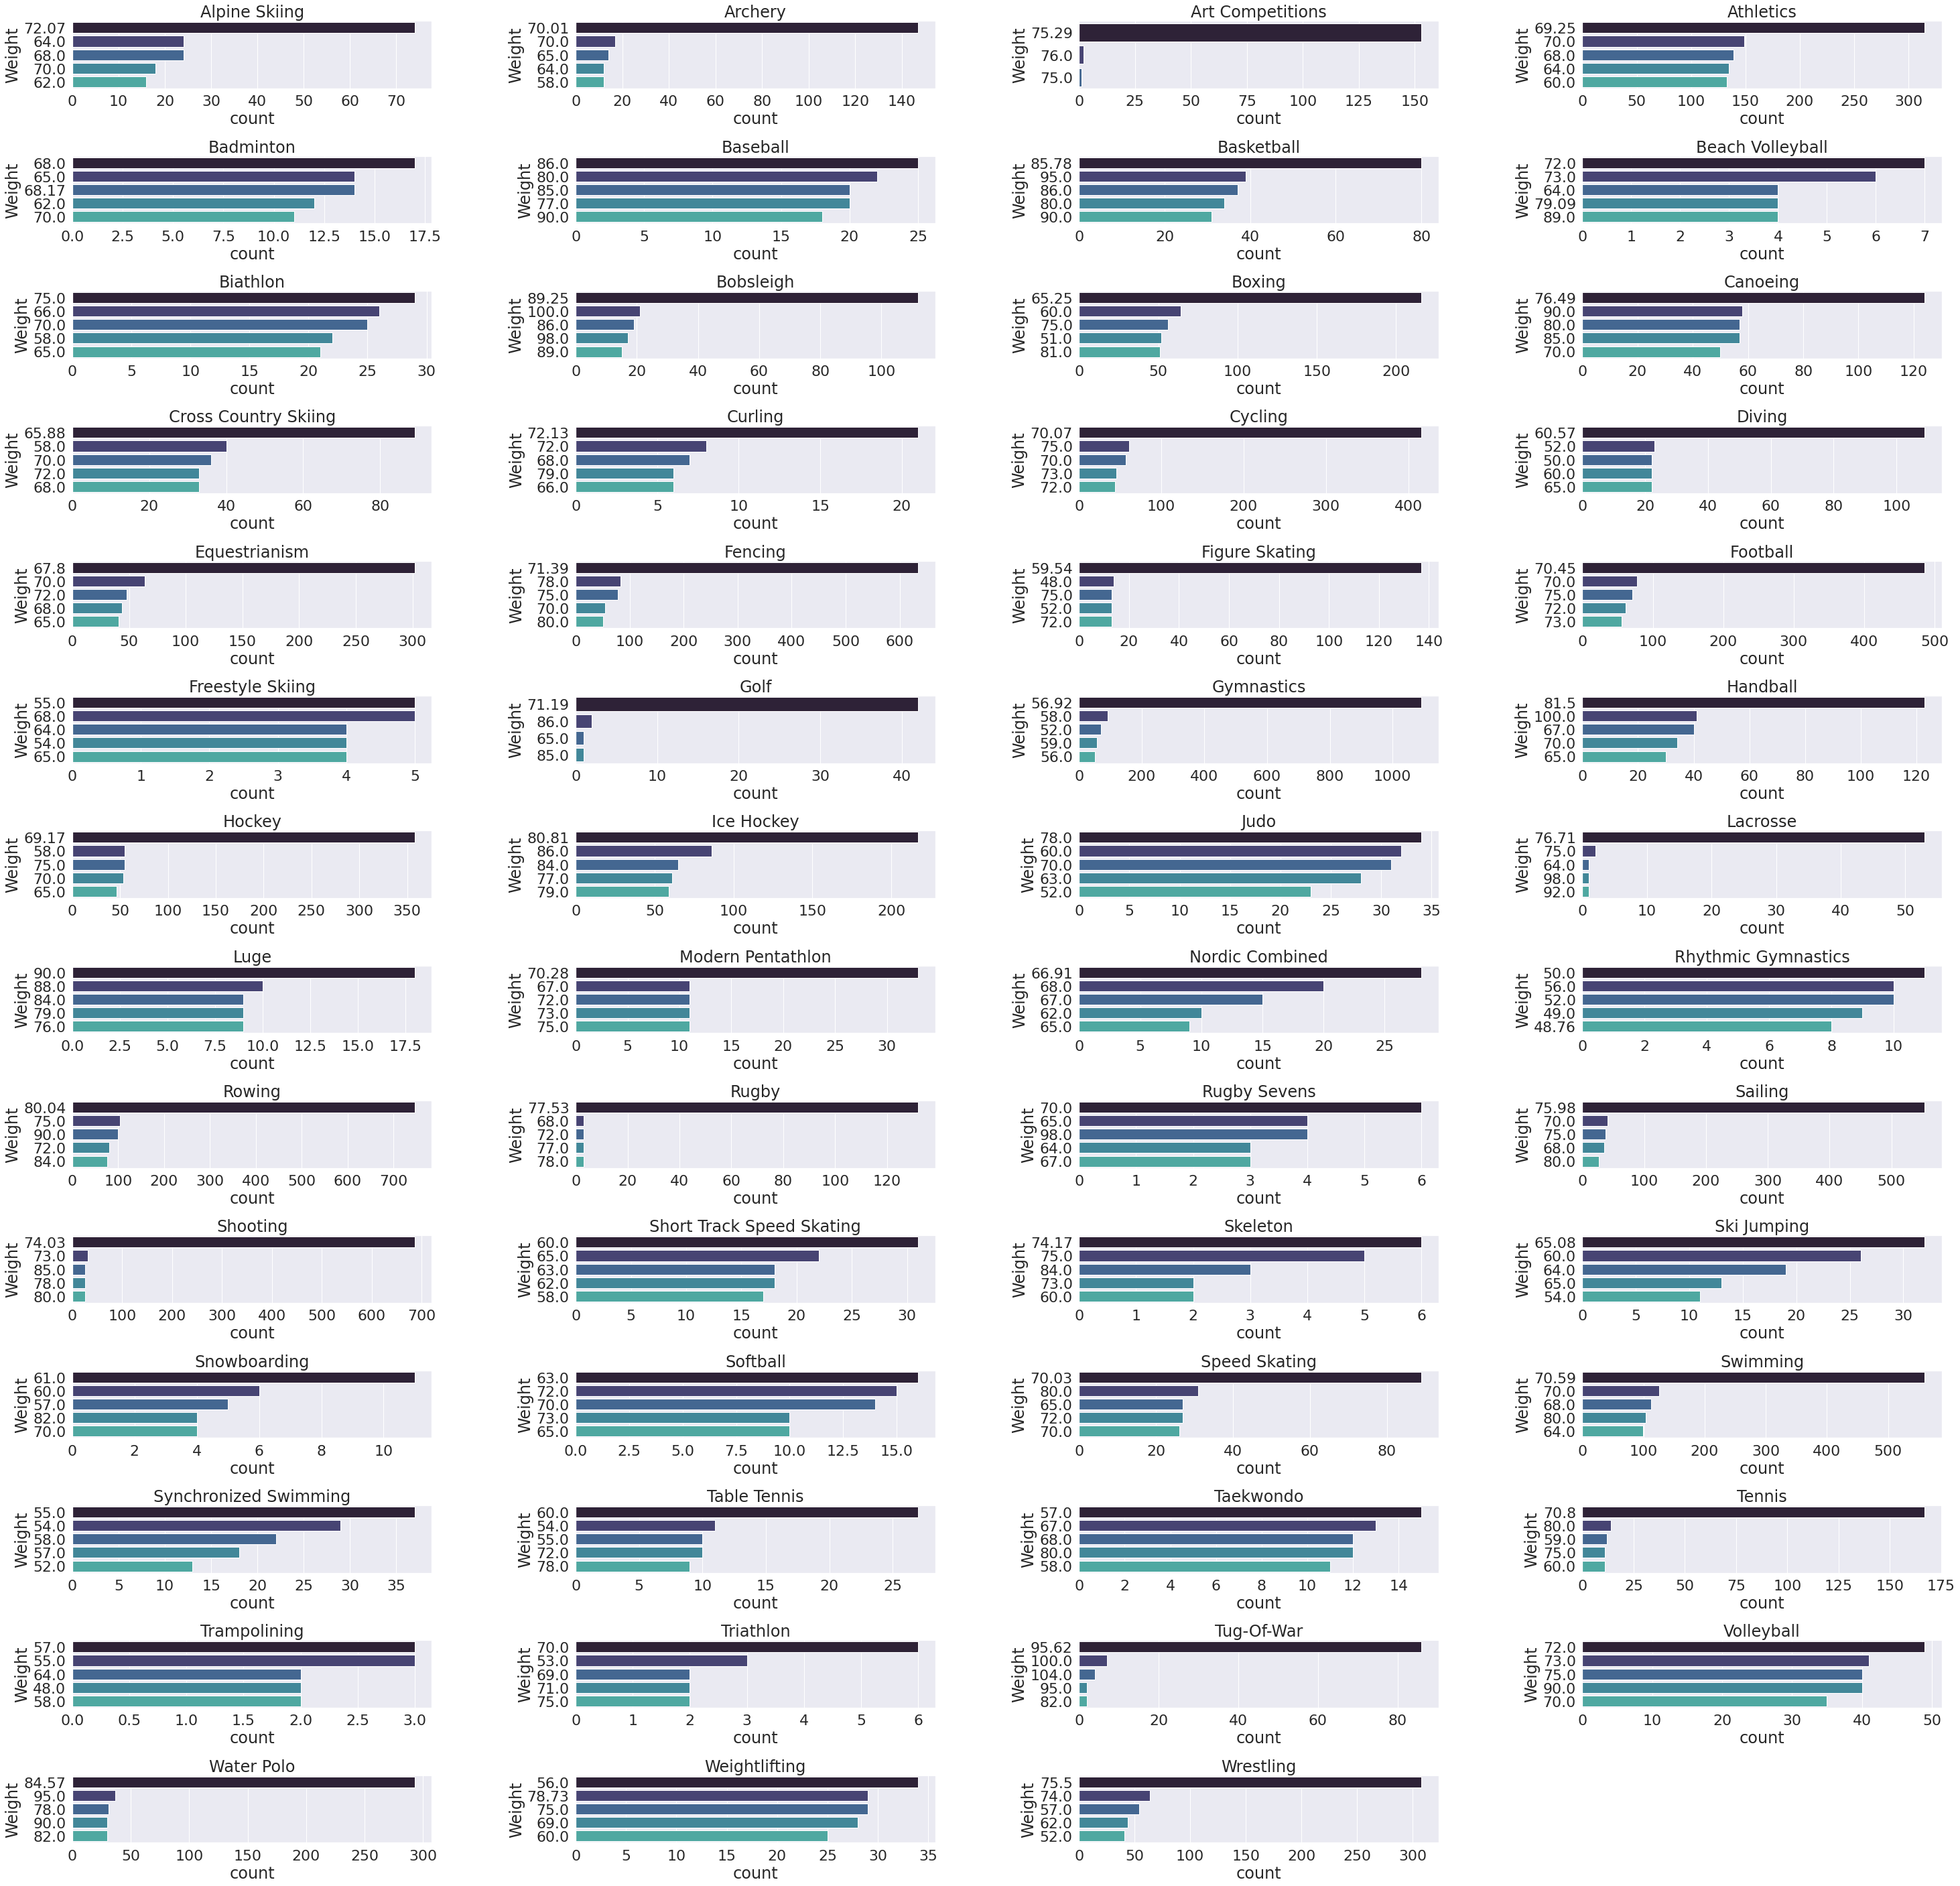

In [20]:
n_cols = 4
nrows = round(len(data_clean['Sport'].unique()) / n_cols)
fig, axes = plt.subplots(nrows, n_cols, figsize=(50,50))
plt.subplots_adjust(wspace=0.4, hspace=1)
index = 0
for row in range(nrows):
    for col in range(n_cols):
        try:
            key = list(selected_sport_country.keys())[index]
        except:
            axes[row][col].set_visible(False)
        
        selected_df = data_clean[data_clean['Sport'] == key]
        selected_country = selected_sport_country[key]
        
        counted_df_index = selected_df['Weight'].value_counts().index[0:5]

        selected_df = selected_df[selected_df['Weight'].isin(counted_df_index)]
        sns.countplot(y="Weight", data=selected_df, order=counted_df_index, ax=axes[row][col], palette=sns.color_palette("mako", as_cmap=False)).set_title(key)
        #axes[row][col].set_title(key)
        
        index += 1
plt.show()

## 4. Show Best Country For Each Sport

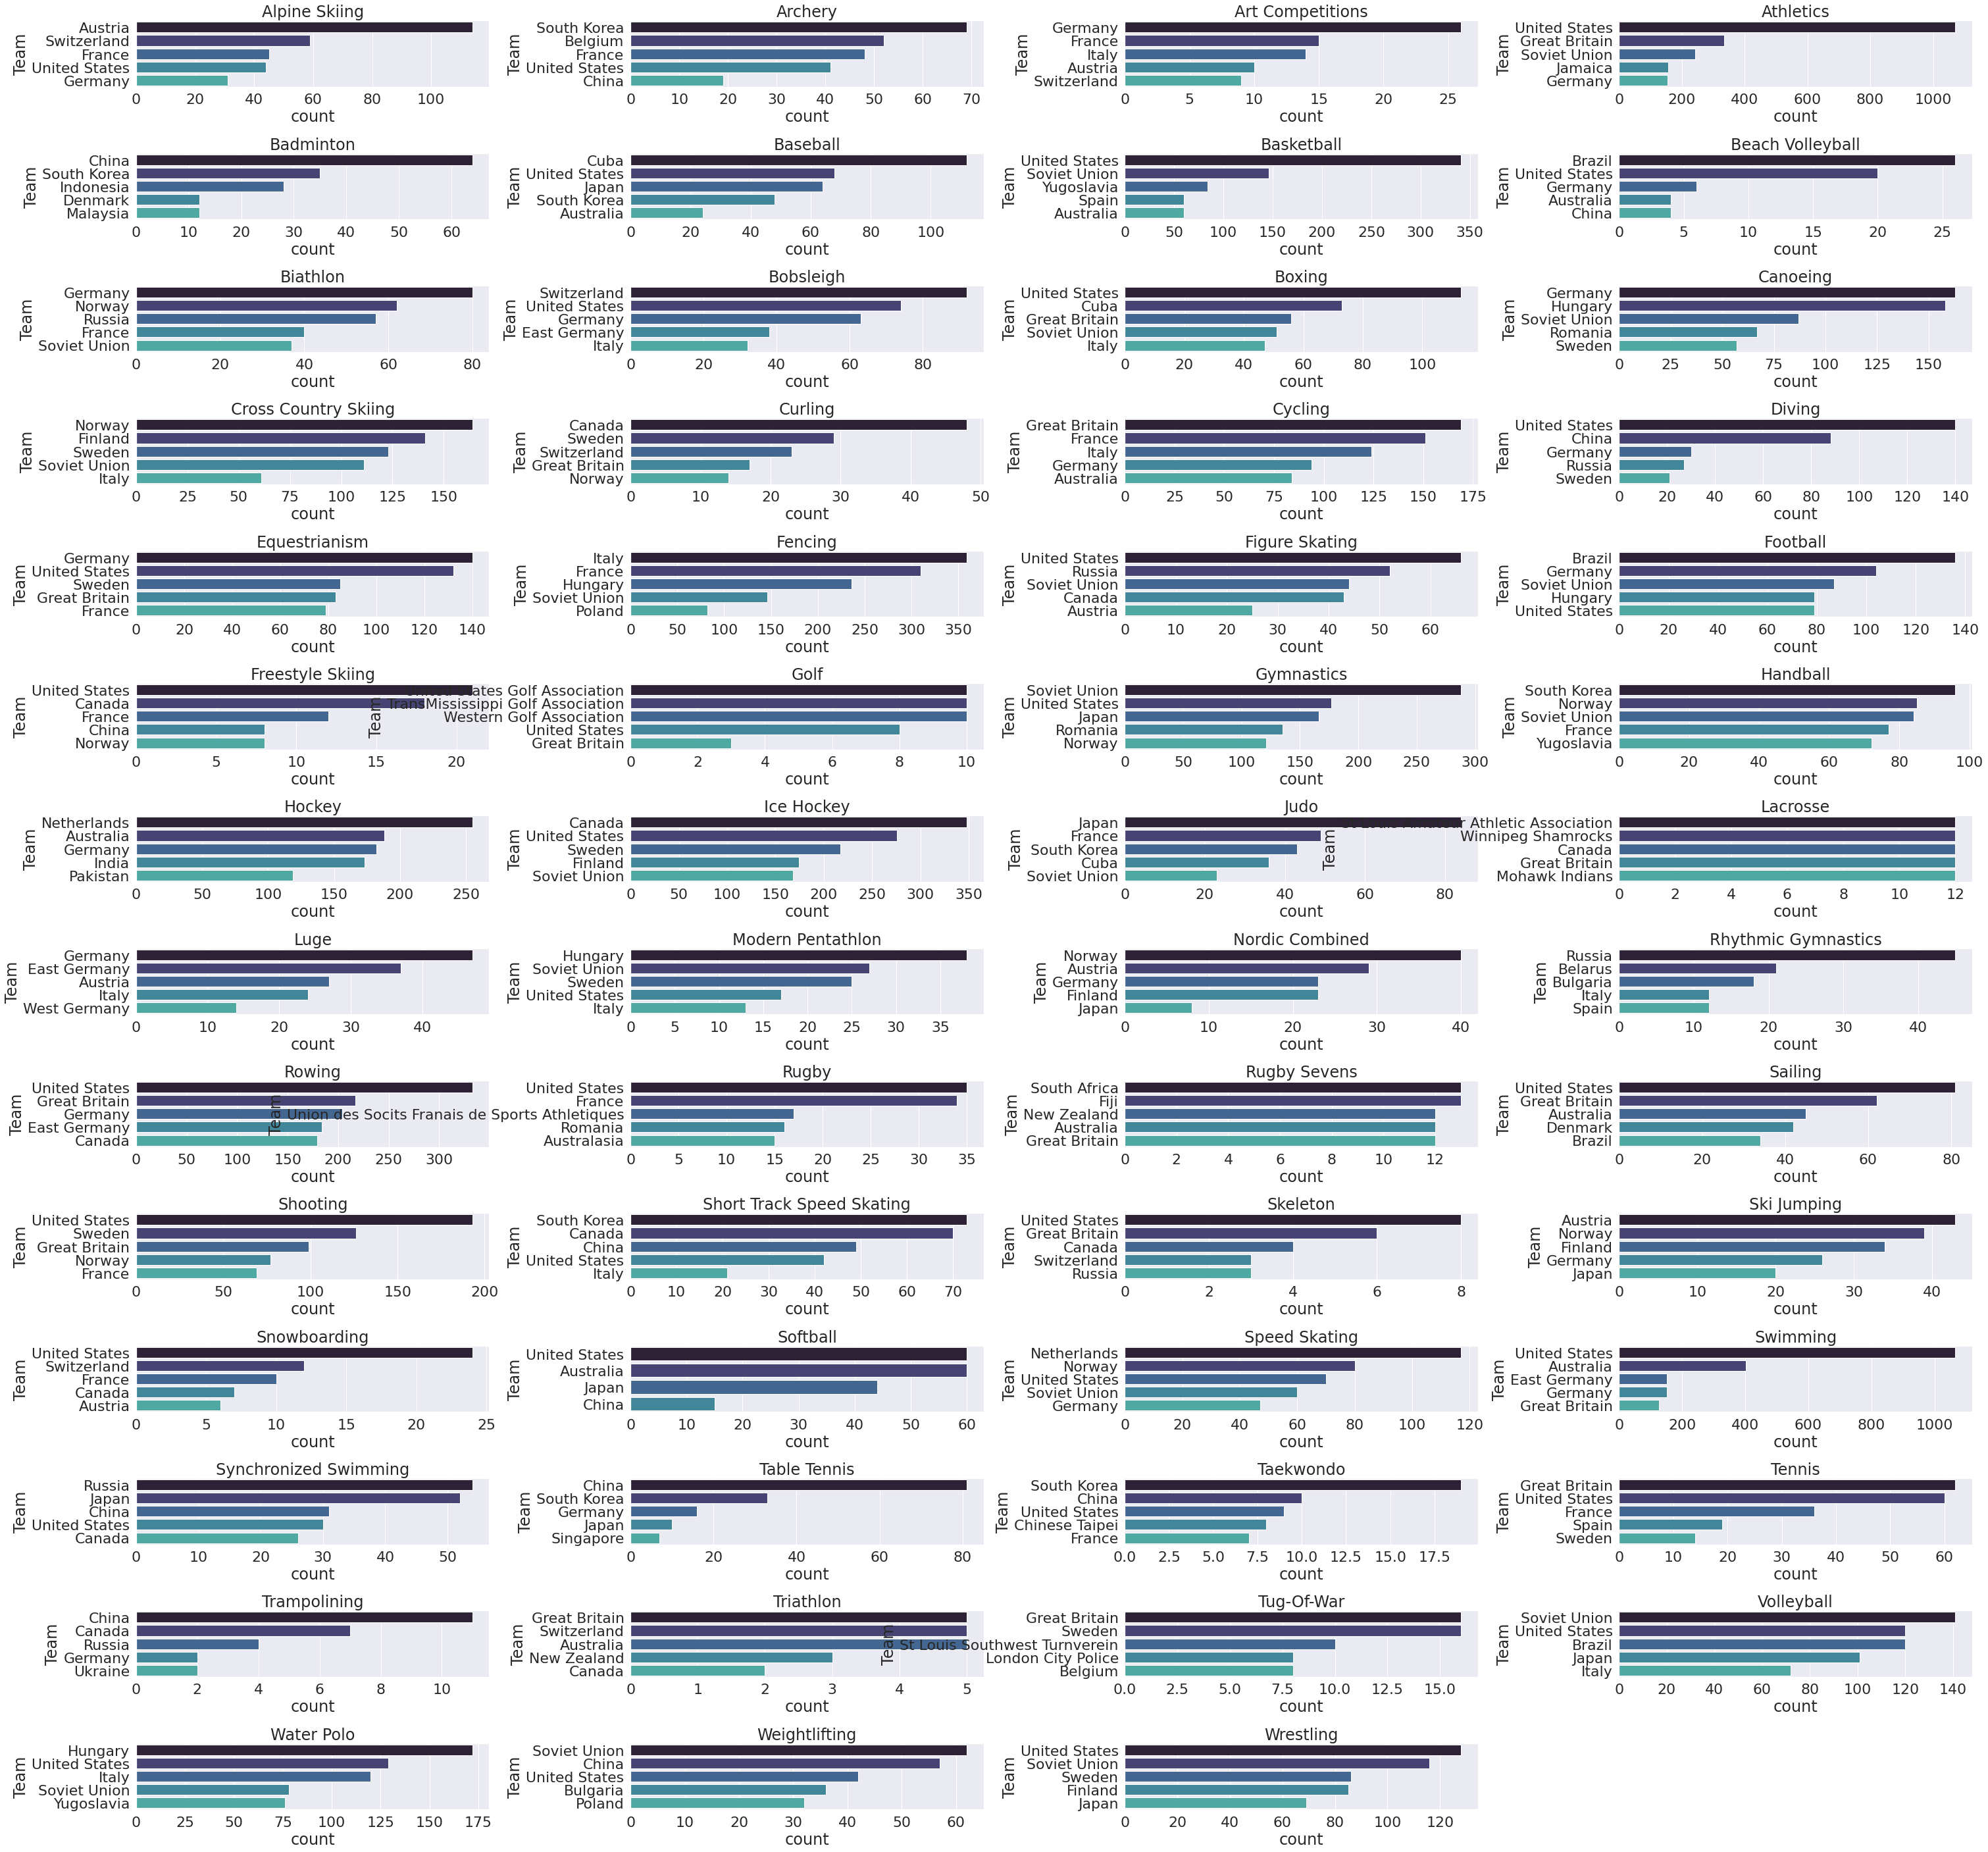

In [21]:
n_cols = 4
nrows = round(len(data_clean['Sport'].unique()) / n_cols)
fig, axes = plt.subplots(nrows, n_cols, figsize=(50,50))
plt.subplots_adjust(wspace=0.4, hspace=1)
index = 0
for row in range(nrows):
    for col in range(n_cols):
        try:
            key = list(selected_sport_country.keys())[index]
        except:
            axes[row][col].set_visible(False)
        
        selected_df = data_clean[data_clean['Sport'] == key]
        selected_country = selected_sport_country[key]
        
        counted_df_index = selected_df['Team'].value_counts().index[0:5]
        
        selected_df = selected_df[selected_df['Team'].isin(counted_df_index)]
        sns.countplot(y="Team", data=selected_df, order=counted_df_index, ax=axes[row][col], palette=sns.color_palette("mako", as_cmap=False)).set_title(key)
        #axes[row][col].set_title(key)
        
        index += 1
plt.show()

## 5. Show The Change of Top Countries by Year

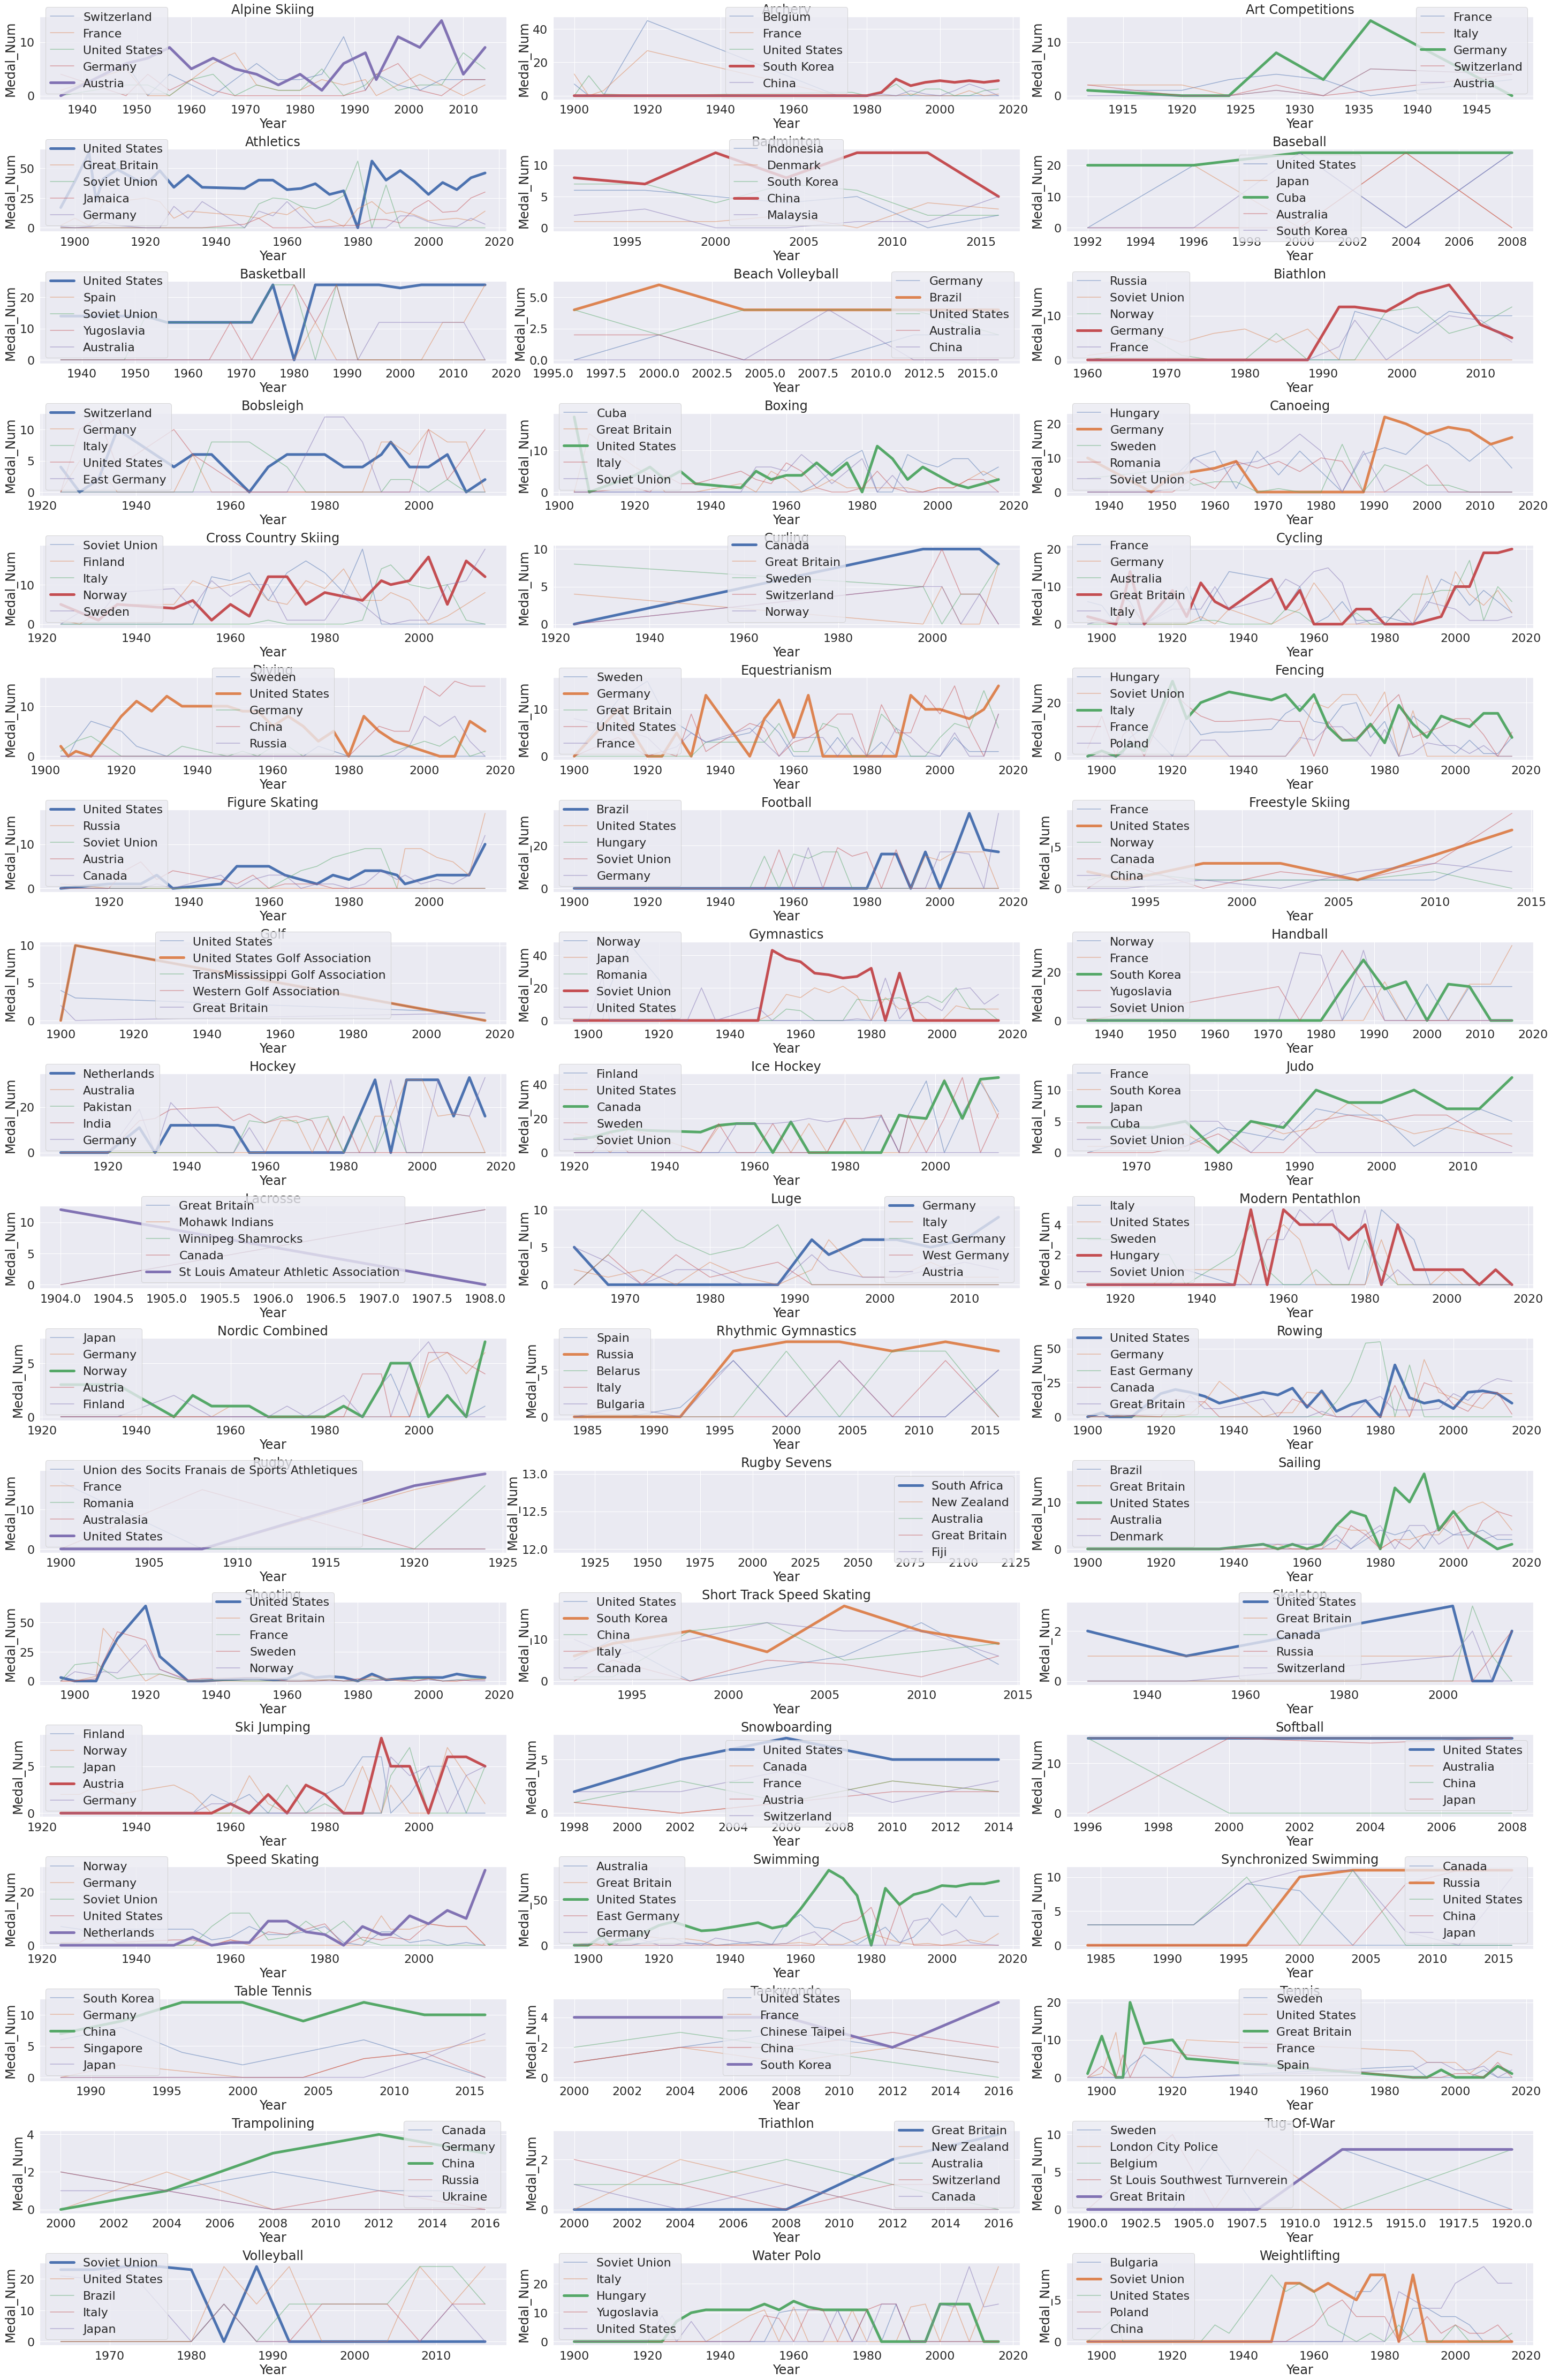

In [22]:
n_cols = 3
nrows = round(len(data_clean['Sport'].unique()) / n_cols)
fig, axes = plt.subplots(nrows, n_cols, figsize=(50,80))
plt.subplots_adjust(wspace=0.1, hspace=0.6)
index = 0
for row in range(nrows):
    for col in range(n_cols):
        try:
            key = list(selected_sport_country.keys())[index]
        except:
            axes[row][col].set_visible(False)
        
        selected_df = data_clean[data_clean['Sport'] == key]
        years = selected_df['Year'].sort_values().unique()
        default_medal_df = pd.DataFrame(columns=['Year', 'Medal_Num'])
        default_medal_df['Year'] = years
        default_medal_df['Medal_Num'] = 0
        default_medal_df = default_medal_df.set_index('Year')
        selected_country = selected_sport_country[key]
        
        counted_df_index = selected_df['Team'].value_counts().index[0:5]
        selected_df = selected_df[selected_df['Team'].isin(counted_df_index)]
        
        for team in selected_df['Team'].unique():
            temp_df = selected_df[selected_df['Team'] == team]
            temp_df['Medal_Num'] = 1
            temp_group_df = temp_df.groupby(['Year']).sum()
            temp_group_df = temp_group_df.reset_index()
            temp_group_df = temp_group_df[['Year', 'Medal_Num']]
            temp_group_df = temp_group_df.set_index('Year')
            
            olympics_df = temp_group_df.add(default_medal_df, fill_value=0)
            if team == selected_country:
                sns.lineplot(data=olympics_df, x=olympics_df.index, y="Medal_Num", label=team, linewidth=5, ax=axes[row][col]).set_title(key)
            else:
                sns.lineplot(data=olympics_df, x=olympics_df.index, y="Medal_Num", label=team, alpha=0.5, ax=axes[row][col]).set_title(key)
        #axes[row][col].set_title(key)
        
        index += 1
plt.show()